In [1]:
#Nuttavadee Autsavapanakit 62130500237

In [2]:
# Import Packages
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, UpSampling2D, Activation
from keras import backend as K
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import seaborn as sns

Using TensorFlow backend.


import necessary package

In [3]:
# Read the csv files
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

# Get X and y for training
X = train.drop(['label'], axis=1)
y = train['label']

# Train, Test and Validate Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=123)

# Reshape and Rescale the images
X_train = X_train.values.reshape(-1,28,28,1) / 255
X_test = X_test.values.reshape(-1,28,28,1) / 255
X_validate = X_validate.values.reshape(-1,28,28,1) / 255

- Access(read) train and test csv file through the path
- Get data without label (drop specify label - column 1) put in X variable.
- Get the label of the data and put in variable y 
- Split the data into Train, Test, and Validate set both for X and y using scikit learn train_test_split (split stratify to original dataset)
- Set test size to 0.2
- using training_test_split() from library scikit-learn
- random_state is the object that controls randomization during splitting (use random_state to reproduce same output every time.)
- Then reshape and rescale .reshape is to gives a new shape to an array without changing its data.
- .reshape(-1,28,28,1) / 255  is test in 28 by 28 pixels and  the image is in greyscale and python random between 0-255

In [4]:
# Build the autoencoder
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D((2,2), padding='same'))

model.add(Dropout(0.20))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D((2,2), padding='same'))
model.add(Dropout(0.20))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(UpSampling2D((2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(UpSampling2D((2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(1, kernel_size=(3, 3), padding='same', activation='relu'))

model.compile(optimizer='adam', loss="mse",metrics=["accuracy"])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          36928     
__________

***modified code
- We modify the Convolutional 2D layer for the first parameter or filters, we change to 64, and 128 (make the integer to be in form of 2 power n)
- Change dropout number to 0.25

In [5]:
# Train the model
model.fit(X_train, X_train, epochs=5, batch_size=64, validation_data=(X_validate, X_validate), verbose=1)

Train on 25200 samples, validate on 8400 samples
Epoch 1/5
25200/25200 [==============================] - 206s 8ms/step - loss: 0.0143 - acc: 0.8124 - val_loss: 0.0071 - val_acc: 0.8145
Epoch 2/5
25200/25200 [==============================] - 203s 8ms/step - loss: 0.0072 - acc: 0.8146 - val_loss: 0.0044 - val_acc: 0.8146
Epoch 3/5
25200/25200 [==============================] - 202s 8ms/step - loss: 0.0060 - acc: 0.8149 - val_loss: 0.0033 - val_acc: 0.8146
Epoch 4/5
25200/25200 [==============================] - 204s 8ms/step - loss: 0.0053 - acc: 0.8151 - val_loss: 0.0029 - val_acc: 0.8147
Epoch 5/5
25200/25200 [==============================] - 202s 8ms/step - loss: 0.0049 - acc: 0.8151 - val_loss: 0.0027 - val_acc: 0.8147


Train the model using X_train set
- run for 3 epochs 
- define batch_size -> define number of samples processed
- validate the result (pre-test before using test set) by X_validate set 
- verbose tell how do you want to see the training progress for each epoch
  - verbose = 1 means show the progrss bar

In [6]:
# Fitting testing dataset
restored_testing_dataset = model.predict(X_test)

Get predict result of X_test

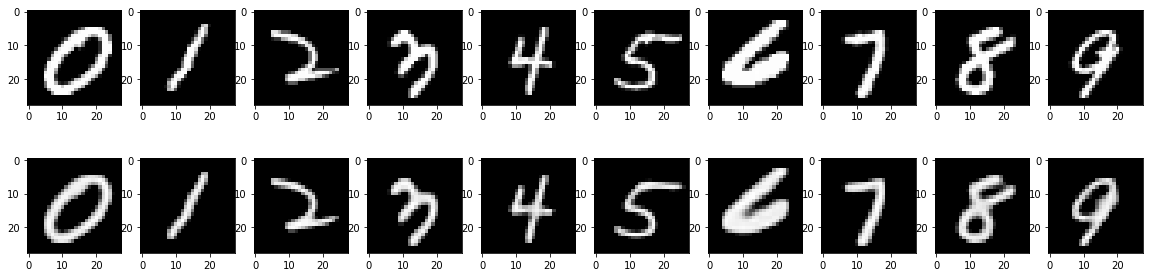

In [7]:
# Observe the reconstructed image quality
plt.figure(figsize=(20,5))
for i in range(10):
    index = y_test.tolist().index(i)
    plt.subplot(2, 10, i+1)
    plt.imshow(X_test[index].reshape((28,28)))
    plt.gray()
    plt.subplot(2, 10, i+11)
    plt.imshow(restored_testing_dataset[index].reshape((28,28)))
    plt.gray()

- Change Figure Size by Matplotlib 
- Convert Index i into list 
- Creating multiple subplots 
- Then the image was shown and the displayed image was resized (28 pixel) to make it look simple by 'X_test[index]' variable. (Since lines 7-9 are similar, but the arrangement of the subplot and image show is different.)
- Recreating multiple subplots 
- In addition, displaying different data is another option. (restored_testing_dataset[index])

In [8]:
# Extract the encoder
encoder = K.function([model.layers[0].input], [model.layers[4].output])

To extract to encoder, the encoder contain the value that get input from layer [0] and get output layer 4 by use function from Keras.

In [9]:
# Encode the training set
encoded_images = encoder([X_test])[0].reshape(-1,7*7*64)

***After modify the converlutional2D layer, then we reshape the encoder to 7x7x64 according to the sequential layer.

In [10]:
# Cluster the training set
kmeans = KMeans(n_clusters=10)
clustered_training_set = kmeans.fit_predict(encoded_images)

- Divide the group/cluster all 10 groups(0-9 digit) by kmean
- Use image from 'endcoded_image' variable to fit predict, then let result to 'clustered_training_set' variable.

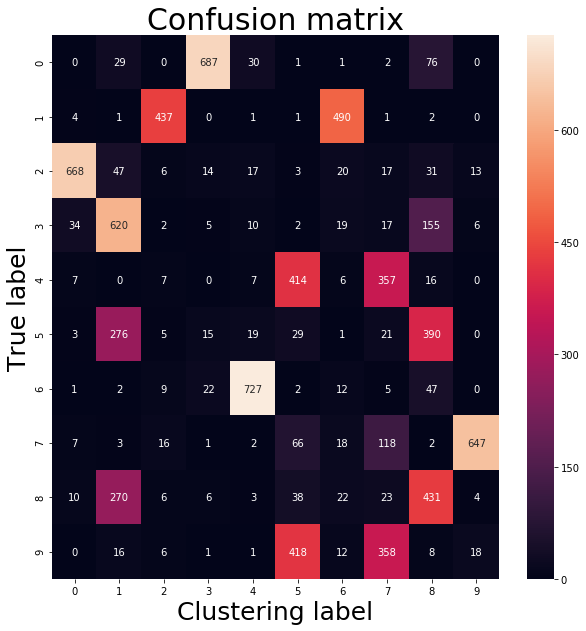

In [11]:
# Observe and compare clustering result with actual label using confusion matrix
cm = confusion_matrix(y_test, clustered_training_set)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrix", fontsize=30)
plt.ylabel('True label', fontsize=25)
plt.xlabel('Clustering label', fontsize=25)
plt.show()

- Let's start by inserting the variable values into cm variable (Confusion matrix) to start working. (Line 2)
- Convert size of figiure to 10-10 pixel (Line 3)
- Use heatmap visualizations to represent the confusion matrix, so it expresses colors at relatively high frequencies. (Line 4)
- Set title of confusion matrix at font size=38 (Confusion matrix). (Line 5)
- Set y-axis title font size=25 (True label). (Line 6)
- Set x-axis title font size=25 (Clustering label). (Line 7)
- Show heatmap confusion matrix after set. (Line 8)

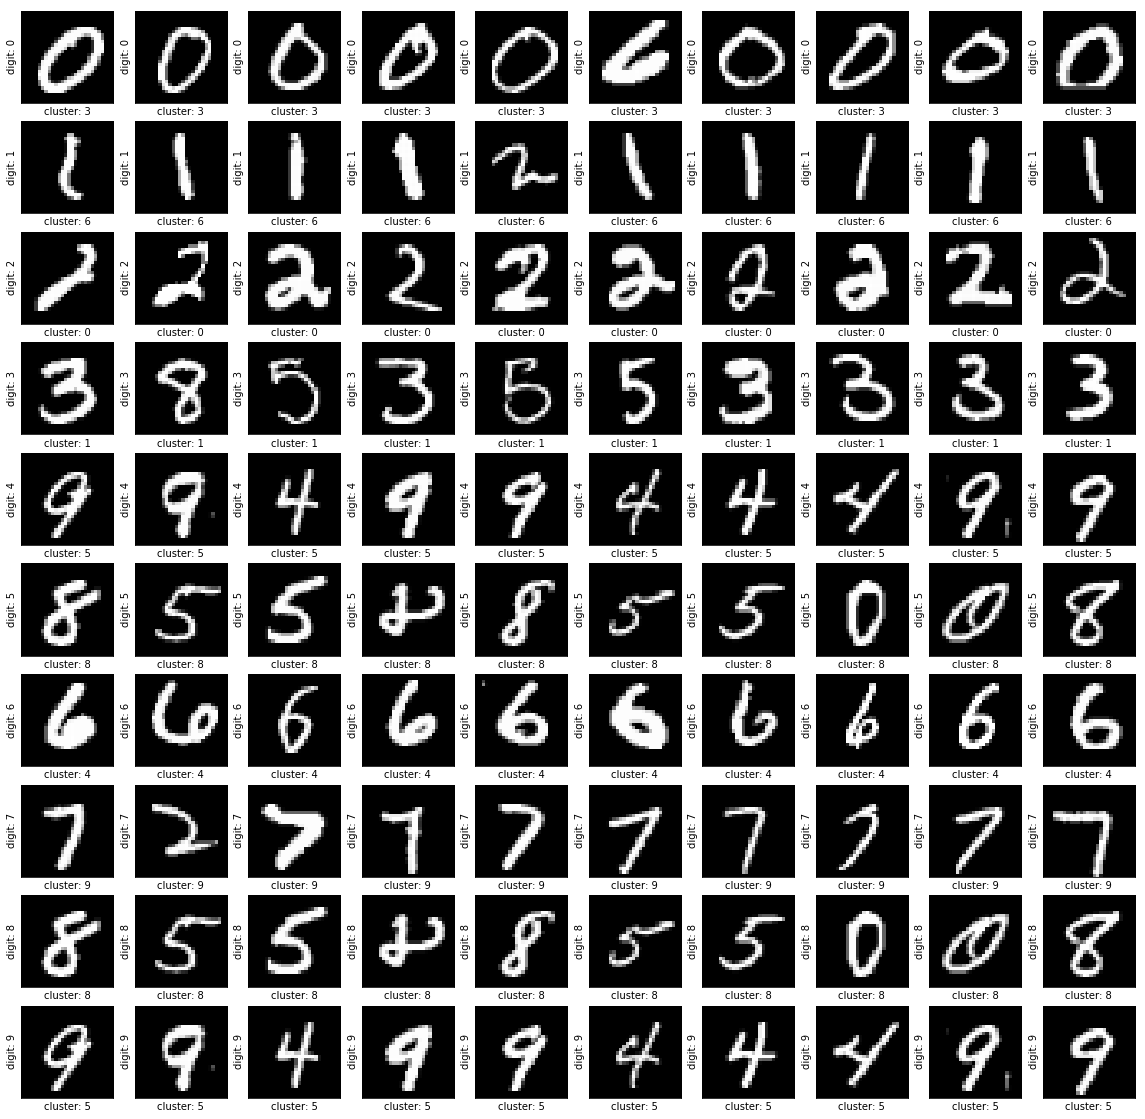

In [12]:
# Plot the actual pictures grouped by clustering
fig = plt.figure(figsize=(20,20))
for r in range(10):
    cluster = cm[r].argmax()
    for c, val in enumerate(X_test[clustered_training_set == cluster][0:10]):
        fig.add_subplot(10, 10, 10*r+c+1)
        plt.imshow(val.reshape((28,28)))
        plt.gray()
        plt.xticks([])
        plt.yticks([])
        plt.xlabel('cluster: '+str(cluster))
        plt.ylabel('digit: '+str(r))

- a figure with that identifier already exists, this figure is made active and returned. figsize=(20,20) = 20 Width,  20 height in inches.
- .argmax() function returns indices of the max element of the array in a particular axis. 
- Use Enumerate() method adds a counter to an iterable and returns it in a form of enumerating object.  For range 0-10.
- Then subplot grid parameters encoded as a single integer 10x10 grid
- imshow() method is used to display an image in a window. The window automatically fits to the image size.
- gray() function in pyplot module of matplotlib library is used to set the colormap to “gray”. 
- .xticks([]) set the current tick locations and labels of the x-axis.
- .yticks([]) set the current tick locations and labels of the y-axis.
- .xlabel , .ylabel to label the texts.

In [13]:
c=0
for r in range(y_test.values.size):
    if(clustered_training_set[r]==y_test.values[r]):
        c=c+1
print("accuracy:",c*100/y_test.values.size,"%")

accuracy: 7.464285714285714 %
